In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Galaxies import GalaxyImages
from MagCounts import Count2Mag
from psf_sampler import PSFSampler

In [2]:
# distr_path = "/home/rodrigo/supernova_detection/gal_mags_dev_exp_z_all_Filter_rodrigocd.csv"
distr_path = "/home/rodrigo/supernovae_detection/galaxies/gal_mags_dev_exp_z_all_Filter_rodrigocd.csv"
pixel_size = 0.187
stamp_size = (21, 21)
image_size = (60, 60)
bands = ["g", "r", "i", "z"] # ["Blue", "Yellow-Orange", "Red", "Brown"]
galaxies_gen = GalaxyImages(distr_path=distr_path,
                            pixel_size=pixel_size,
                            stamp_size=stamp_size,
                            image_size=image_size,
                            n_integrations=20,
                            bands=bands,
                            load_all_data=True)

t_exp = [225.0, 225.0, 225.0, 225.0]
seeing = [4.3, 4.0, 5.0, 3.8]
airmass = [1.1, 0.9, 1.8, 0.5]
zero_points = [26.59, 26.59, 26.59, 26.59]

frame = galaxies_gen.distr_dataframe
print(frame.shape)
print(frame[frame["expRad_z"] == 0].shape)

redshift = 0.6
#galaxies_gen.sample_galaxy(redshift)
#stamps = galaxies_gen.generate_galaxy_stamp(t_exp, seeing, airmass)

(773028, 47)
(0, 47)


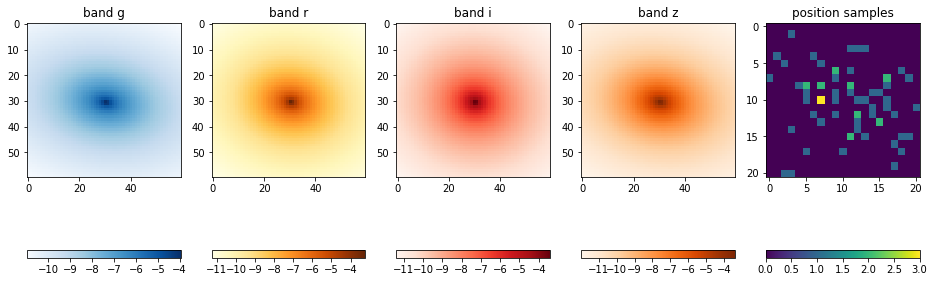

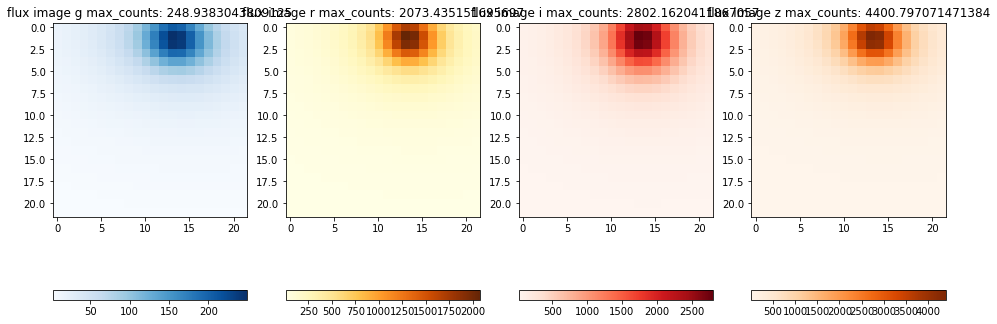

In [3]:
redshift = []
galaxies_gen.sample_galaxy()
parameters_1 = galaxies_gen.return_params()
#print(par.shape)
f, ax = plt.subplots(1,5,figsize=(16,9))

s = []
colors = ["Blues", "YlOrBr", "Reds", "Oranges"]

for i, band in enumerate(bands):
    s.append(ax[i].imshow(np.log(galaxies_gen.profile[band]["norm_image"]), interpolation="none", cmap=colors[i]))
    f.colorbar(s[-1], orientation="horizontal", ax=ax[i])
    ax[i].set_title("band "+band)

histogram = np.zeros(shape=image_size)
pos = galaxies_gen.sample_position_galaxy(n_samples=100)
for p in pos:
    histogram[p[0],p[1]] += 1
s5 = ax[-1].imshow(histogram[20:41, 20:41], interpolation="none")
ax[-1].set_title("position samples")
#s2 = ax2.imshow(histogram, interpolation="none")   
f.colorbar(s5, orientation="horizontal", ax=ax[-1])
#print(np.sum(galaxies_gen.norm_img))
plt.show()

f, ax = plt.subplots(1,4,figsize=(16,9))

s = []
colors = ["Blues", "YlOrBr", "Reds", "Oranges"]

for i, band in enumerate(bands):
    stamp = galaxies_gen.generate_galaxy_stamp(band, t_exp[i], seeing[i], airmass[i], 
                                               zero_point=zero_points[i], airmass_term=0.15)
    s.append(ax[i].imshow(stamp, interpolation="none", cmap=colors[i]))
    f.colorbar(s[-1], orientation="horizontal", ax=ax[i])
    ax[i].set_title("flux image "+band+" max_counts: "+str(np.amax(stamp)))
    
plt.show()

In [4]:
obs_cond_path = "../real_obs/pickles/camera_and_obs_cond.pkl"
sampler = PSFSampler(camera_and_obs_cond_path=obs_cond_path)

  0%|          | 0/2312 [00:00<?, ?it/s]

Doing psf match to compute SEEING


100%|██████████| 2312/2312 [00:32<00:00, 71.03it/s]


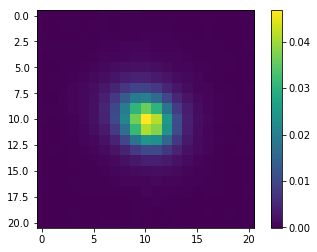

In [9]:
test_psf, test_seeing = sampler.sample_psf(4.2)
plt.imshow(test_psf)
plt.colorbar()
plt.show()

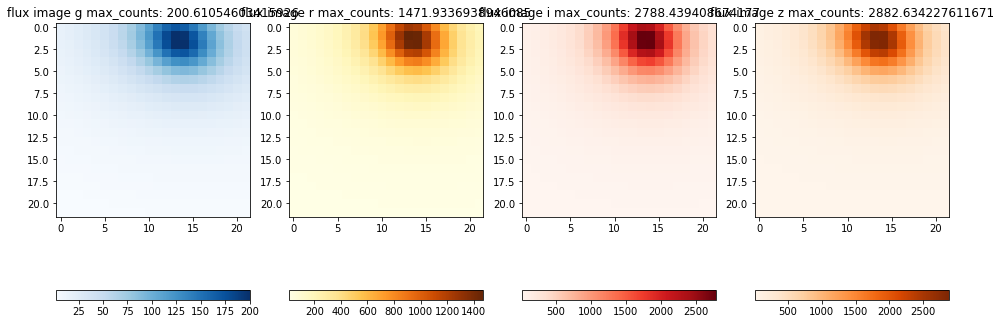

In [10]:
f, ax = plt.subplots(1,4,figsize=(16,9))

s = []
colors = ["Blues", "YlOrBr", "Reds", "Oranges"]

for i, band in enumerate(bands):
    stamp = galaxies_gen.generate_galaxy_stamp(band=band, t_exp=t_exp[i], seeing=seeing[i], airmass=None,
                                               zero_point=zero_points[i], airmass_term=0.15, psf=test_psf)
    s.append(ax[i].imshow(stamp, interpolation="none", cmap=colors[i]))
    f.colorbar(s[-1], orientation="horizontal", ax=ax[i])
    ax[i].set_title("flux image "+band+" max_counts: "+str(np.amax(stamp)))

plt.show()

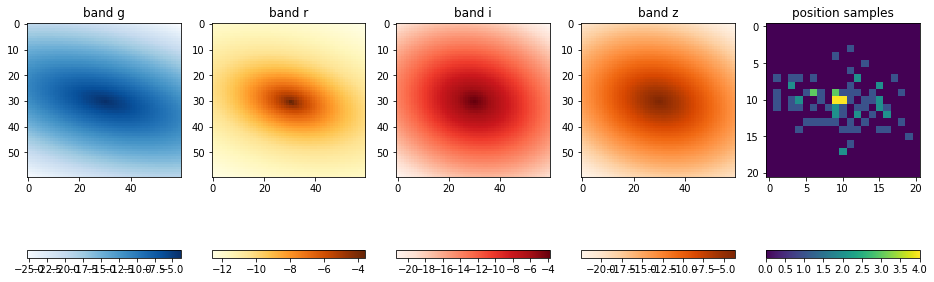

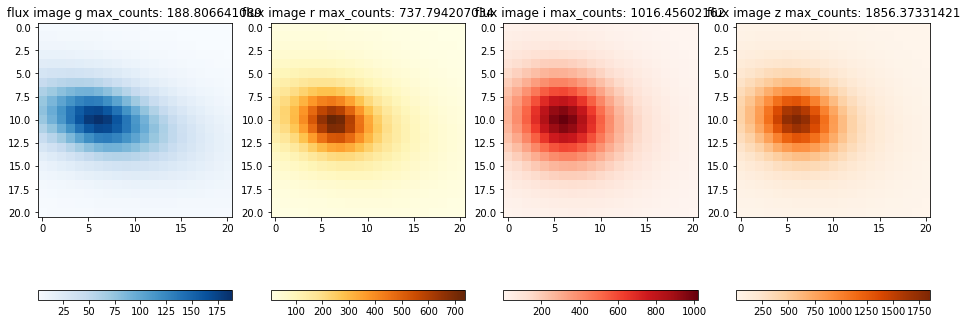

In [4]:
redshift = []
galaxies_gen.sample_galaxy()
parameters_2 = galaxies_gen.return_params()
#print(par.shape)
f, ax = plt.subplots(1,5,figsize=(16,9))
s = []
colors = ["Blues", "YlOrBr", "Reds", "Oranges"]

for i, band in enumerate(bands):
    s.append(ax[i].imshow(np.log(galaxies_gen.profile[band]["norm_image"]), interpolation="none", cmap=colors[i]))
    f.colorbar(s[-1], orientation="horizontal", ax=ax[i])
    ax[i].set_title("band "+band)

histogram = np.zeros(shape=image_size)
pos = galaxies_gen.sample_position_galaxy(n_samples=100)
for p in pos:
    histogram[p[0],p[1]] += 1
s5 = ax[-1].imshow(histogram[20:41, 20:41], interpolation="none")
ax[-1].set_title("position samples")
#s2 = ax2.imshow(histogram, interpolation="none")   
f.colorbar(s5, orientation="horizontal", ax=ax[-1])
#print(np.sum(galaxies_gen.norm_img))
plt.show()

f, ax = plt.subplots(1,4,figsize=(16,9))

s = []
colors = ["Blues", "YlOrBr", "Reds", "Oranges"]

for i, band in enumerate(bands):
    stamp = galaxies_gen.generate_galaxy_stamp(band, t_exp[i], seeing[i], airmass[i], 
                                               zero_point=zero_points[i], airmass_term = 0.15)
    s.append(ax[i].imshow(stamp, interpolation="none", cmap=colors[i]))
    f.colorbar(s[-1], orientation="horizontal", ax=ax[i])
    ax[i].set_title("flux image "+band+" max_counts: "+str(np.amax(stamp)))
    
plt.show()

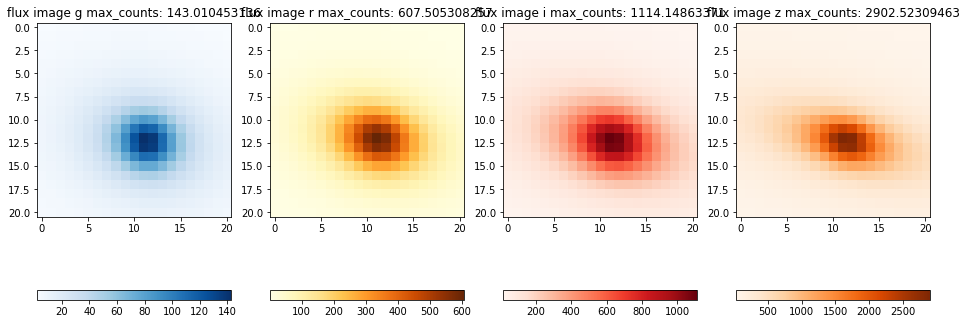

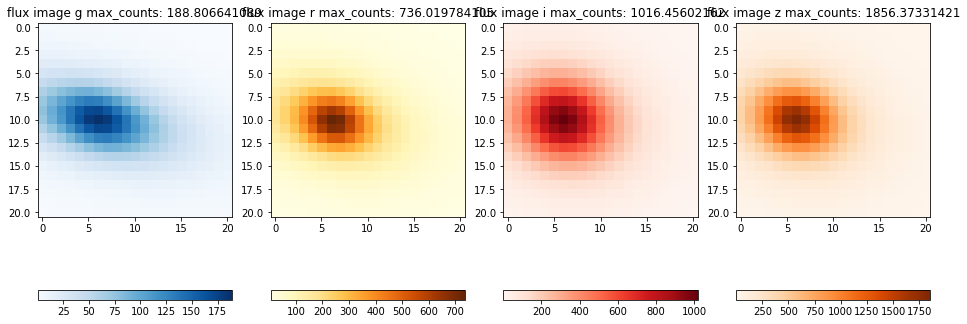

In [5]:
galaxies_gen.create_profile(pixel_size=pixel_size, params=parameters_1)

f, ax = plt.subplots(1,4,figsize=(16,9))

s = []
colors = ["Blues", "YlOrBr", "Reds", "Oranges"]

for i, band in enumerate(bands):
    stamp = galaxies_gen.generate_galaxy_stamp(band, t_exp[i], seeing[i], airmass[i], 
                                               zero_point=zero_points[i], airmass_term=0.15, params=parameters_1)
    s.append(ax[i].imshow(stamp, interpolation="none", cmap=colors[i]))
    f.colorbar(s[-1], orientation="horizontal", ax=ax[i])
    ax[i].set_title("flux image "+band+" max_counts: "+str(np.amax(stamp)))
    
plt.show()

galaxies_gen.create_profile(pixel_size=pixel_size, params=parameters_2)

f, ax = plt.subplots(1,4,figsize=(16,9))

s = []
colors = ["Blues", "YlOrBr", "Reds", "Oranges"]

for i, band in enumerate(bands):
    stamp = galaxies_gen.generate_galaxy_stamp(band, t_exp[i], seeing[i], airmass[i], 
                                               zero_point=zero_points[i], airmass_term=0.15, params=parameters_2)
    s.append(ax[i].imshow(stamp, interpolation="none", cmap=colors[i]))
    f.colorbar(s[-1], orientation="horizontal", ax=ax[i])
    ax[i].set_title("flux image "+band+" max_counts: "+str(np.amax(stamp)))
    
plt.show()

In [6]:
band = "g"
sampling = []
re_doing = []
parameters = []
t_exp = 225.0
seeing = 4.3
airmass = 1.1
zero_point = 26.59
for i in range(5000):
    galaxies_gen.sample_galaxy()
    parameters.append(galaxies_gen.return_params())
    stamp = galaxies_gen.generate_galaxy_stamp(band, t_exp, seeing, airmass, 
                                               zero_point=zero_point, airmass_term=0.15)
    sampling.append(np.amax(stamp))
for i in range(5000):
    galaxies_gen.create_profile(pixel_size=pixel_size, params=parameters[i])
    stamp = galaxies_gen.generate_galaxy_stamp(band, t_exp, seeing, airmass, 
                                               zero_point=zero_point, airmass_term=0.15, params=parameters[i])
    re_doing.append(np.amax(stamp))

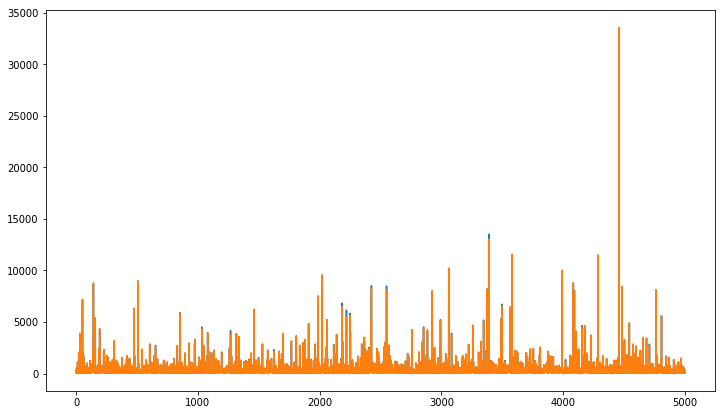

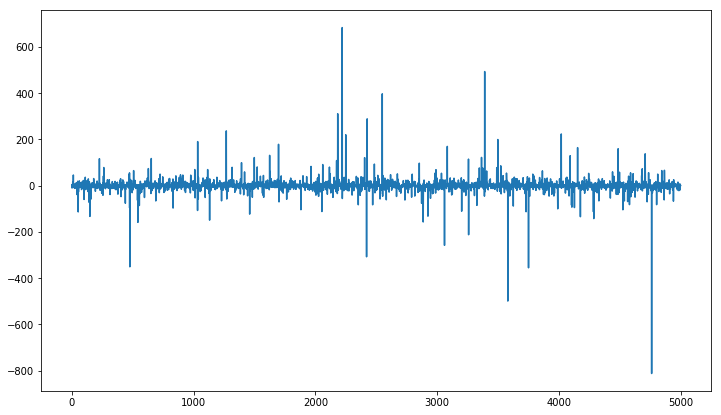

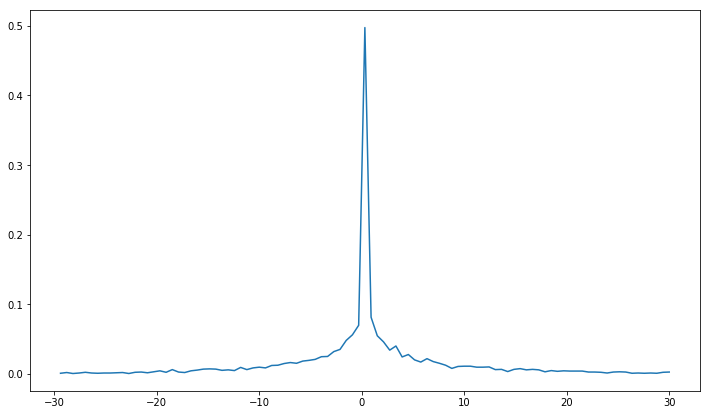

In [8]:
plt.figure(figsize=(12,7))
plt.plot(sampling)
plt.plot(re_doing)
plt.show()

plt.figure(figsize=(12,7))
plt.plot(np.array(sampling)-np.array(re_doing))
plt.show()

plt.figure(figsize=(12,7))
bins = np.linspace(-30,30,100)
h, bins = np.histogram(np.array(sampling)-np.array(re_doing), bins=bins, density=True)
plt.plot(bins[1:], h)
plt.show()

In [8]:
param_frame = galaxies_gen.current_parameters
print(param_frame)
print(param_frame["petroMag_g"])
print(type(param_frame["petroMag_g"]))
param_frame["pos_x"] = 0.23
print(param_frame)
param_frame["pos_y"] = -0.3
param_frame["angle"] = 0.002
print(param_frame.keys())

objid          1.237662e+18
petroMag_g     2.166189e+01
petroFlux_g    2.160185e+00
lnLDeV_g      -4.670123e-02
deVRad_g       1.269839e+00
deVAB_g        5.334166e-01
lnLExp_g      -1.765350e-01
expRad_g       8.006291e-01
expAB_g        5.604891e-01
fracDeV_g      1.000000e+00
petroMag_r     1.996671e+01
petroFlux_r    1.030993e+01
lnLDeV_r      -4.893571e-01
deVRad_r       1.342538e+00
deVAB_r        8.839708e-01
lnLExp_r      -5.628355e+00
expRad_r       8.130389e-01
expAB_r        9.061950e-01
fracDeV_r      1.000000e+00
petroMag_i     1.907821e+01
petroFlux_i    2.337174e+01
lnLDeV_i      -1.801982e-01
deVRad_i       1.388769e+00
deVAB_i        9.999028e-01
lnLExp_i      -1.127059e+01
expRad_i       7.957505e-01
expAB_i        9.201183e-01
fracDeV_i      9.935942e-01
petroMag_u     2.419805e+01
petroFlux_u    1.156622e-01
lnLDeV_u      -3.433656e+00
deVRad_u       7.680157e-04
deVAB_u        3.916896e-01
lnLExp_u      -3.376665e+00
expRad_u       6.211972e-01
expAB_u        9.997

# Galaxy examples

############################################################################################


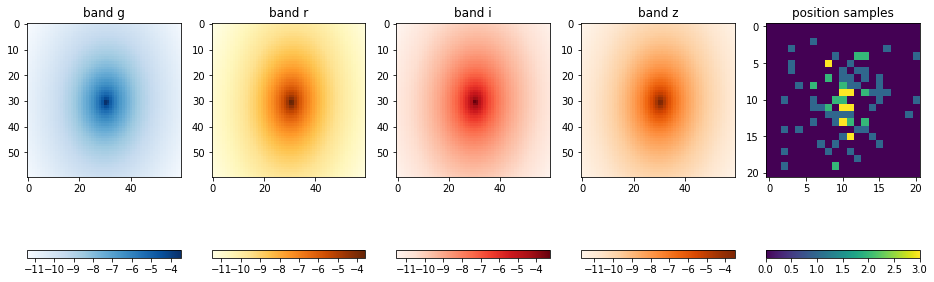

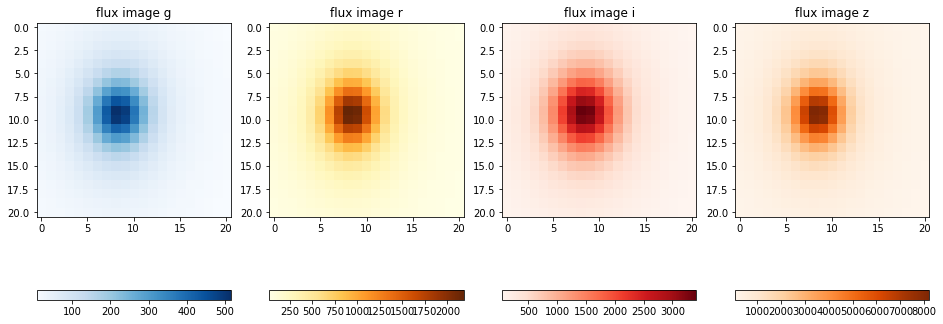

############################################################################################


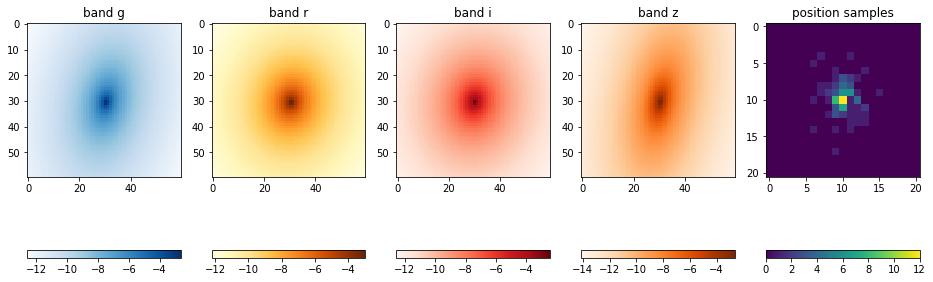

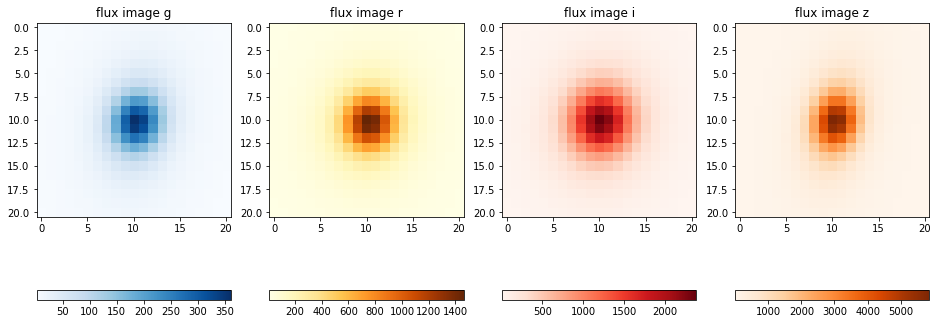

############################################################################################


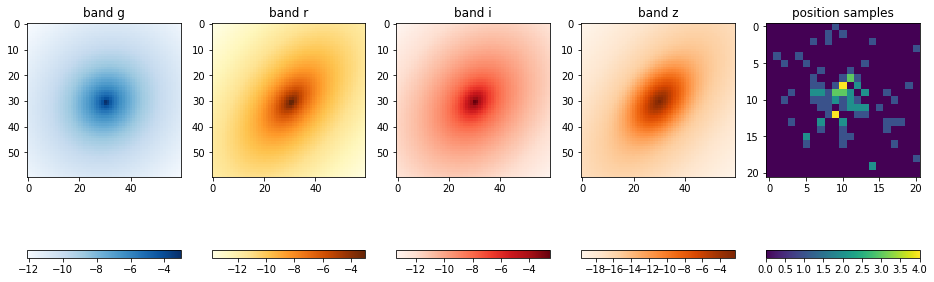

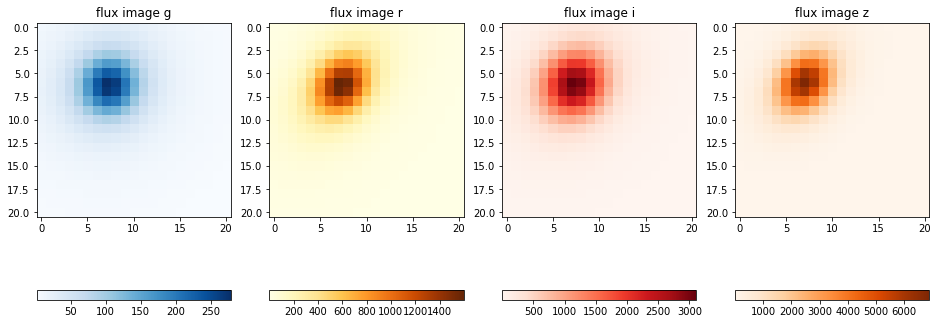

############################################################################################


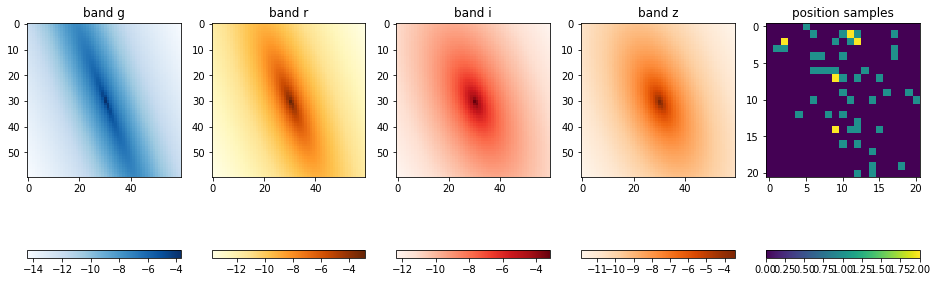

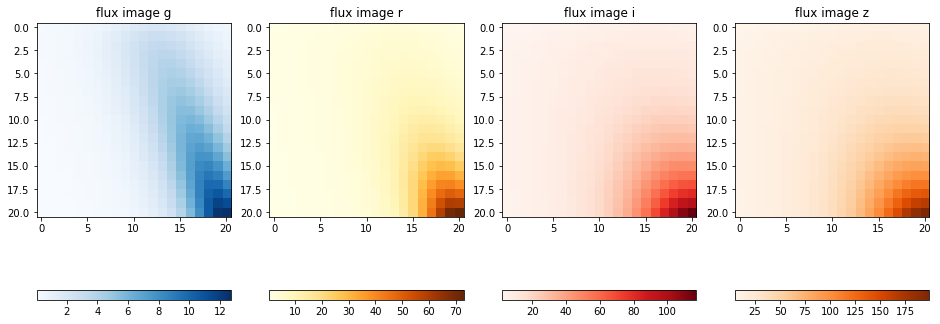

############################################################################################


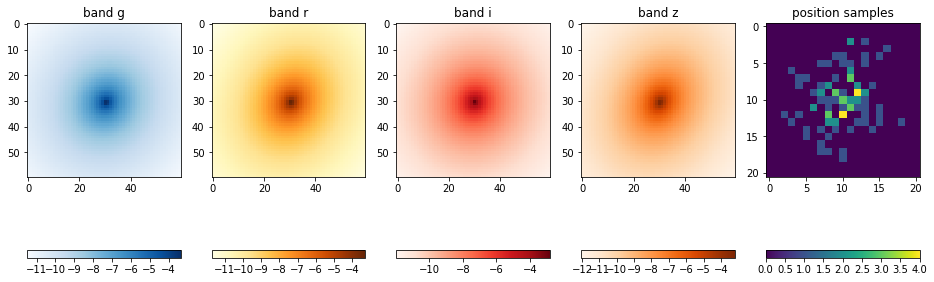

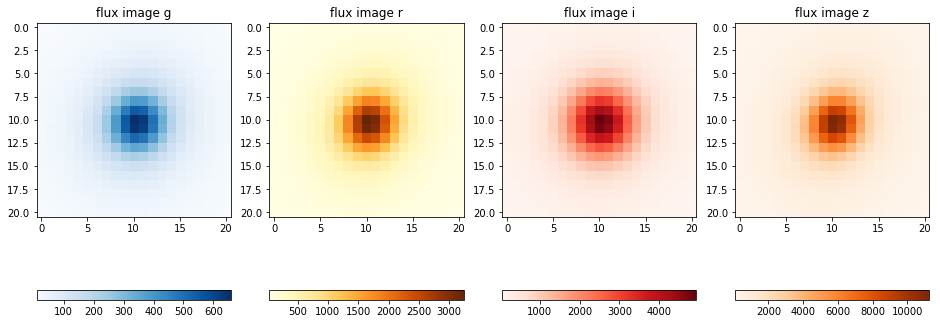

############################################################################################


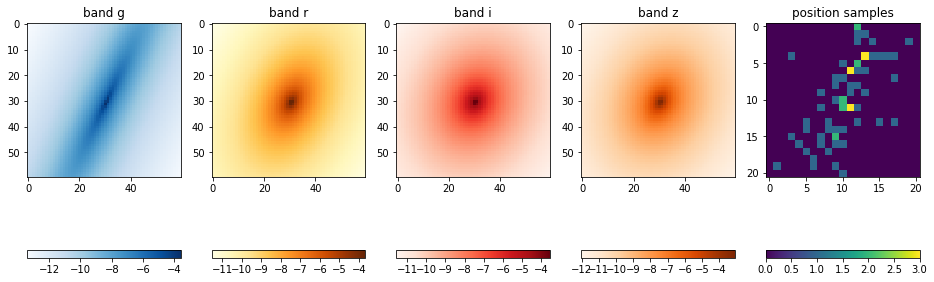

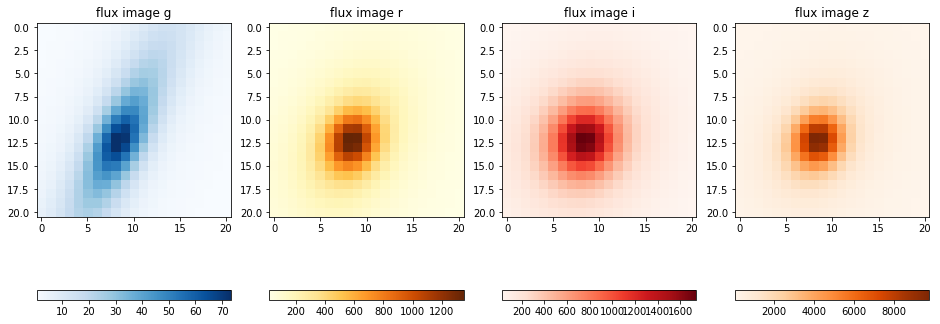

############################################################################################


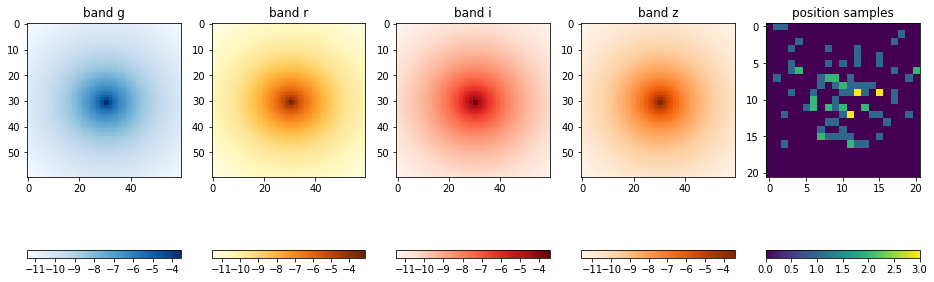

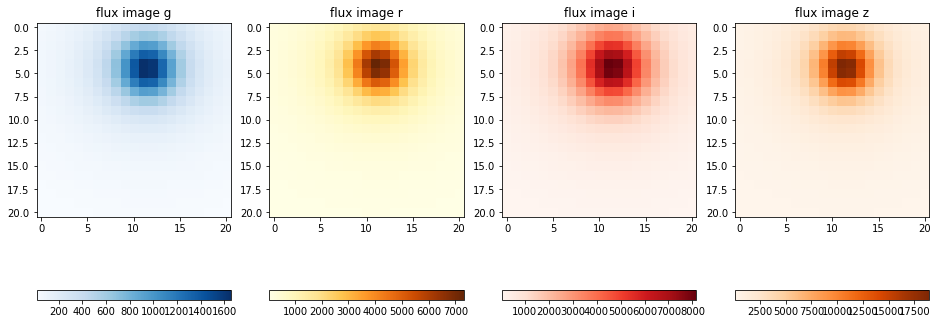

############################################################################################


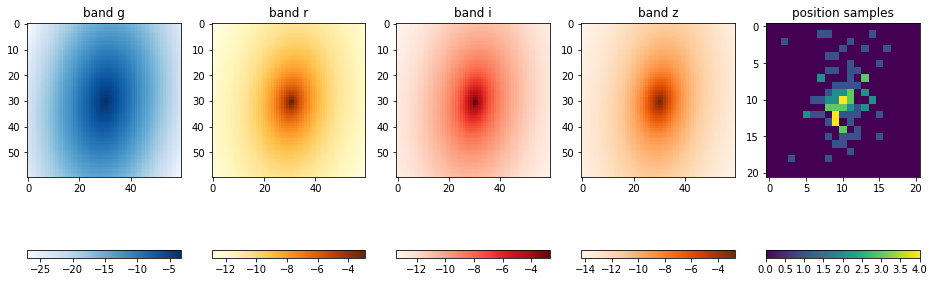

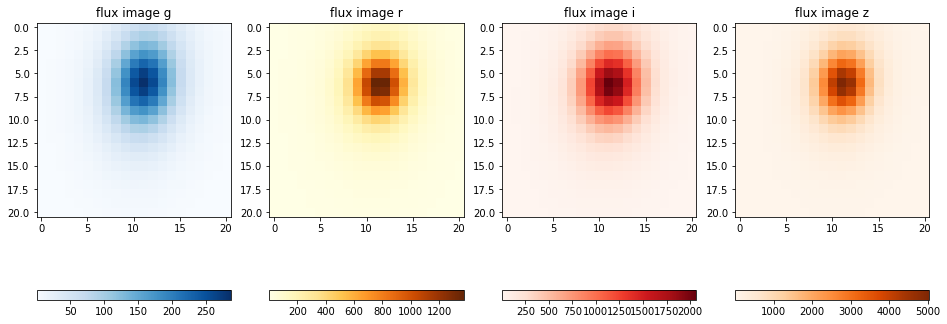

############################################################################################


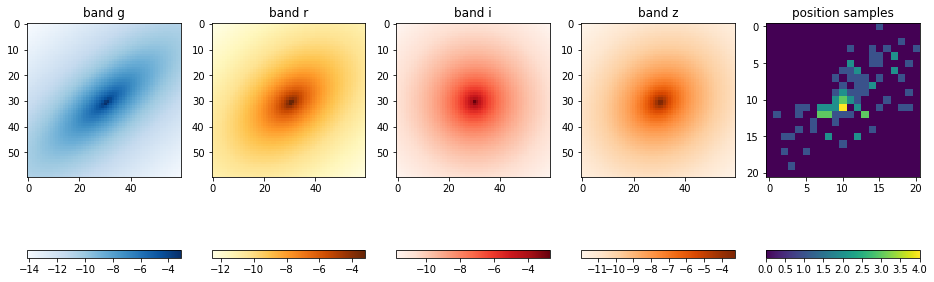

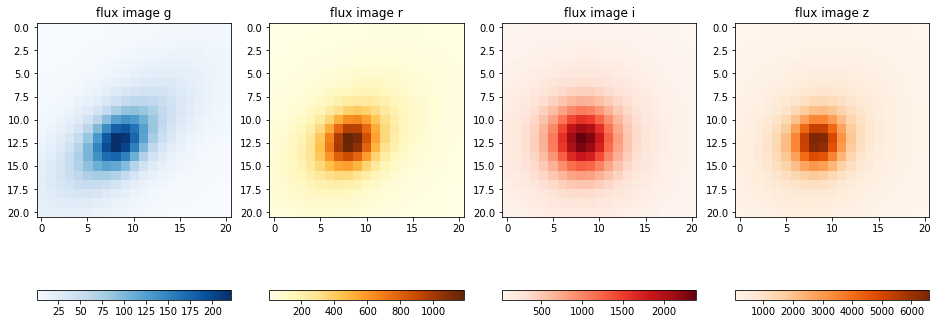

############################################################################################


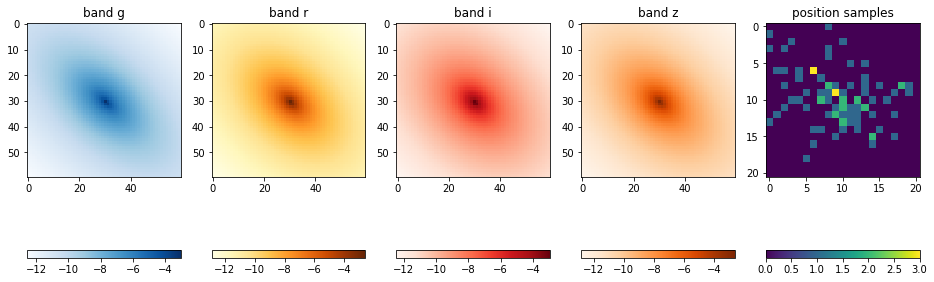

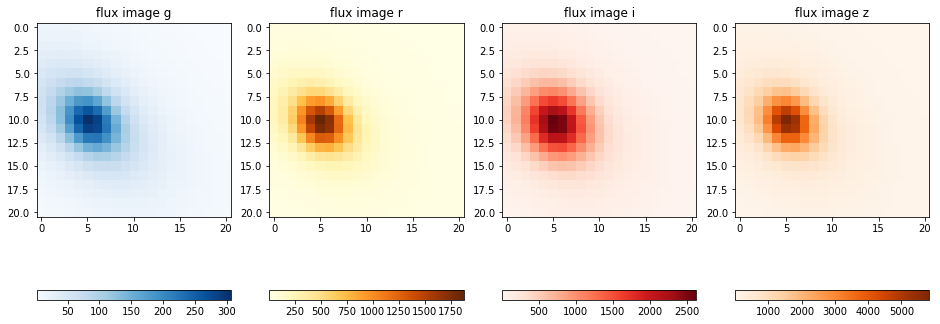

############################################################################################


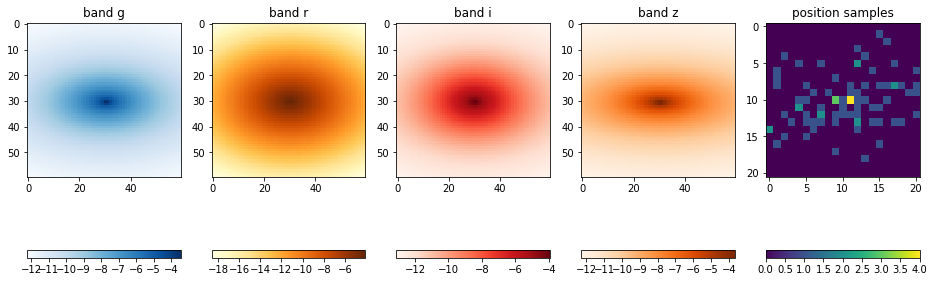

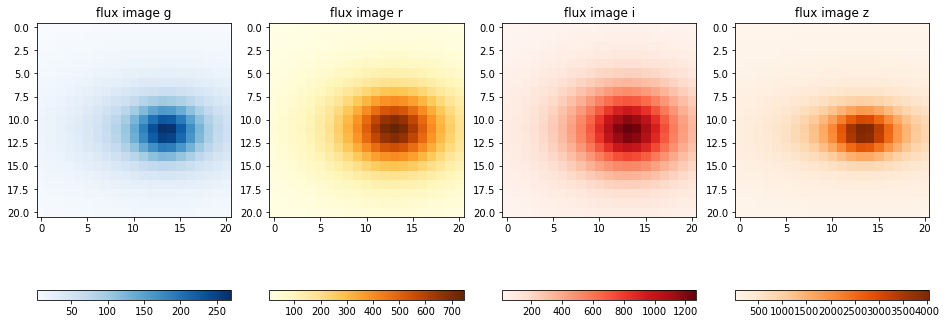

############################################################################################


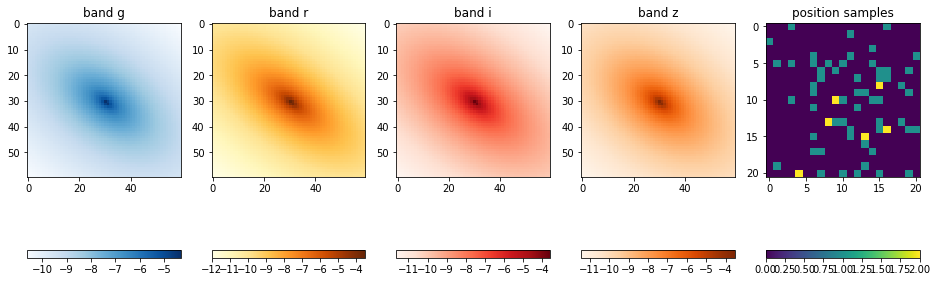

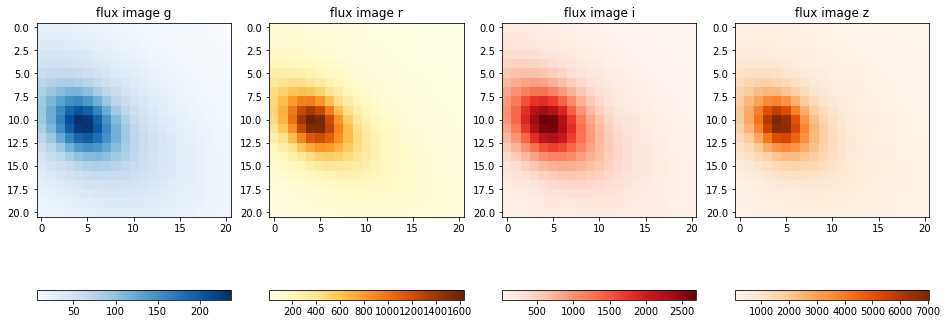

############################################################################################


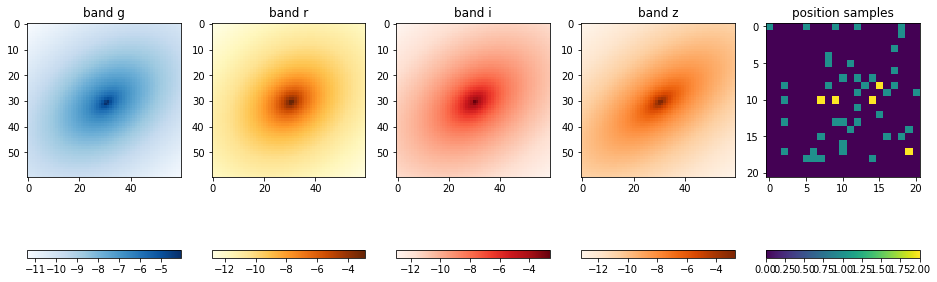

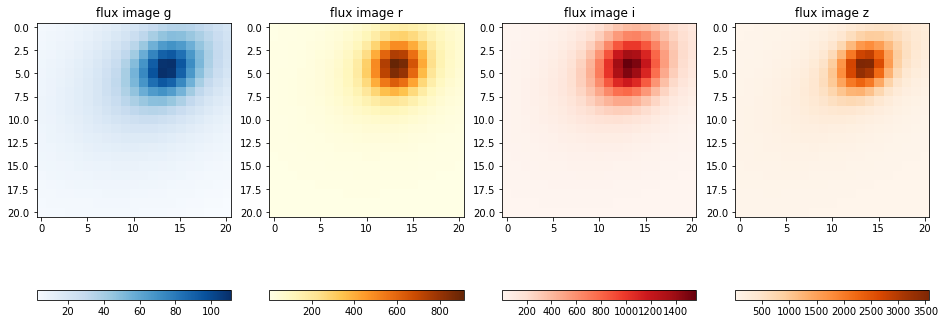

############################################################################################


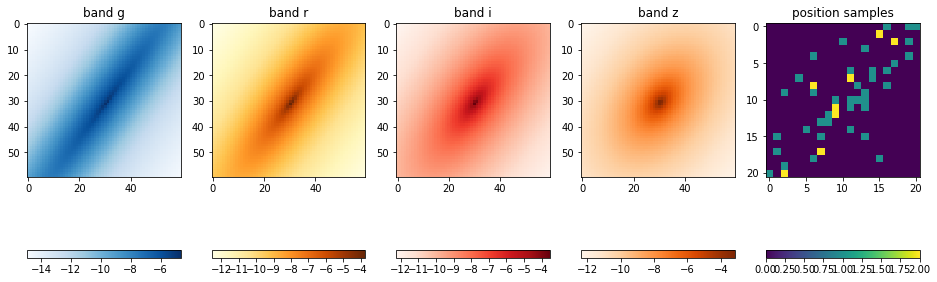

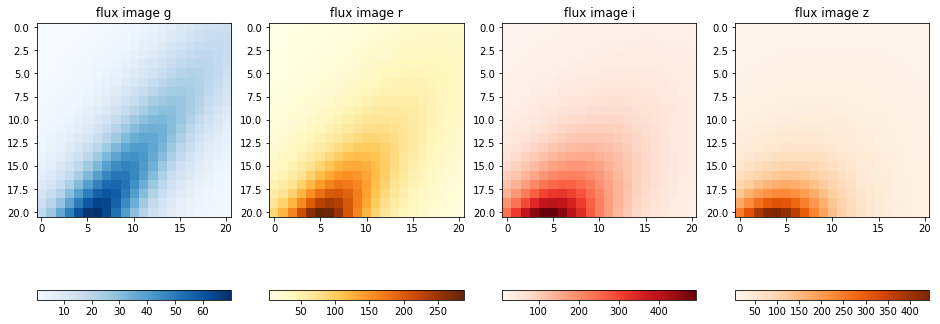

############################################################################################


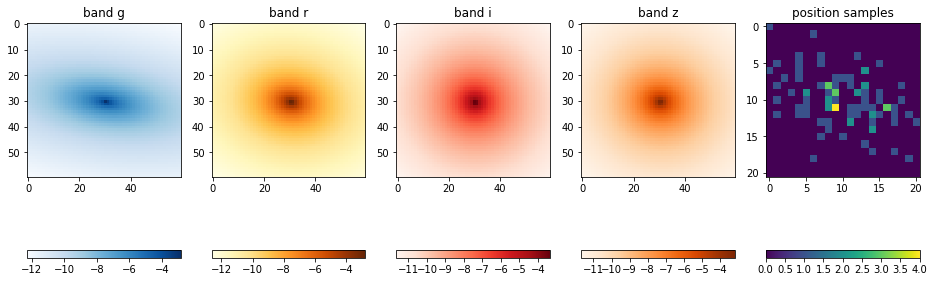

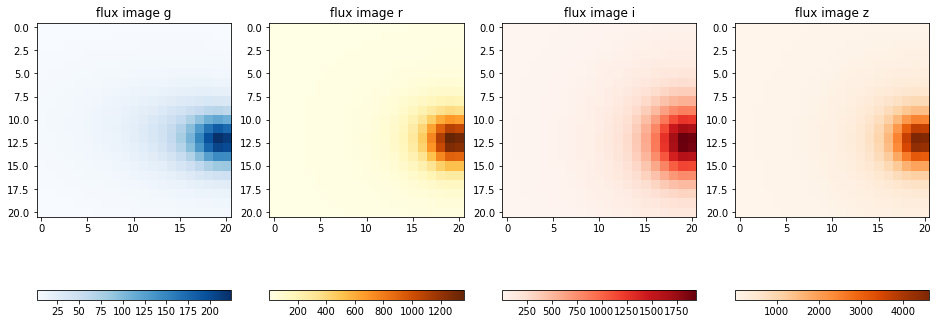

############################################################################################


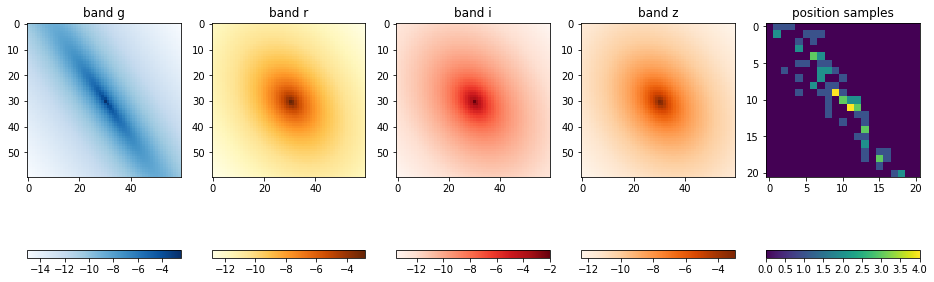

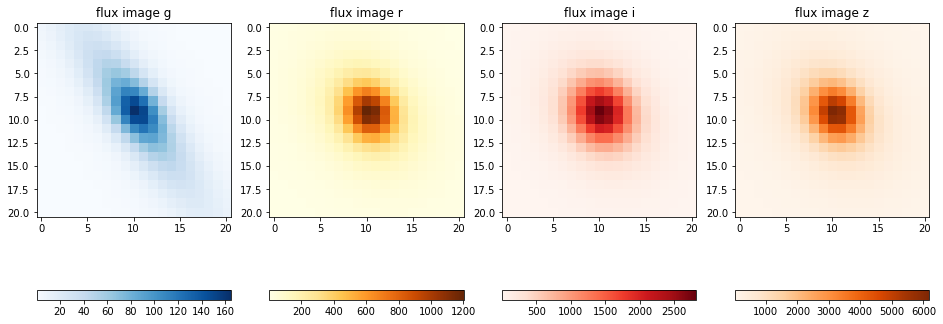

############################################################################################


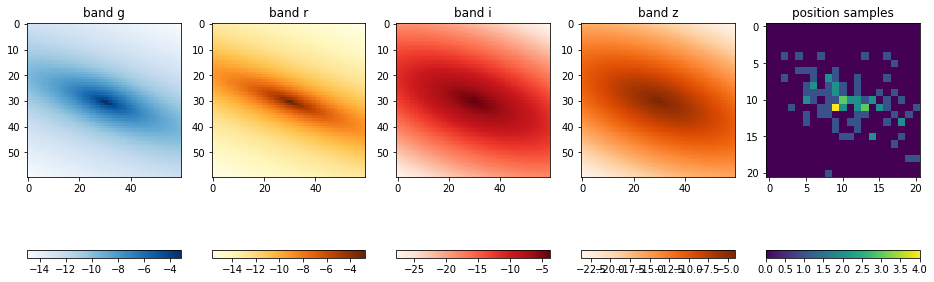

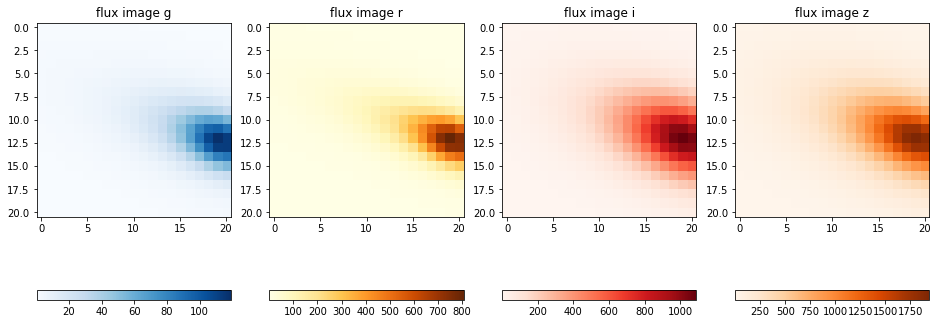

############################################################################################


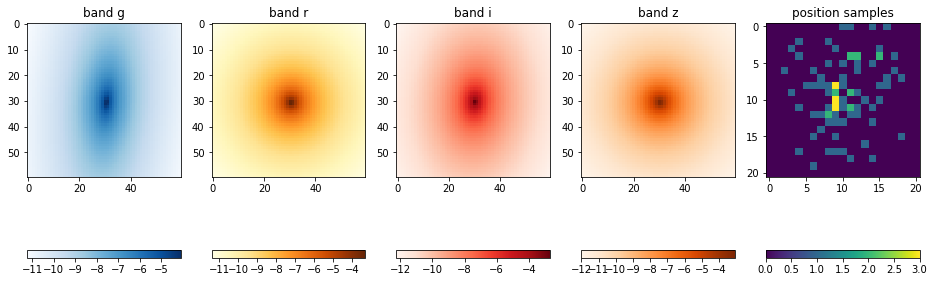

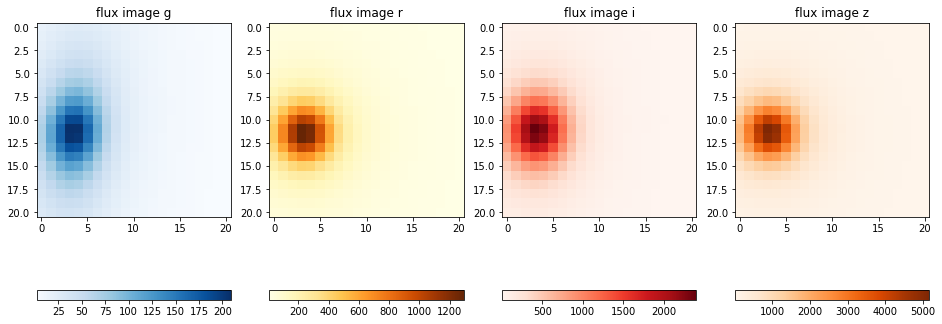

############################################################################################


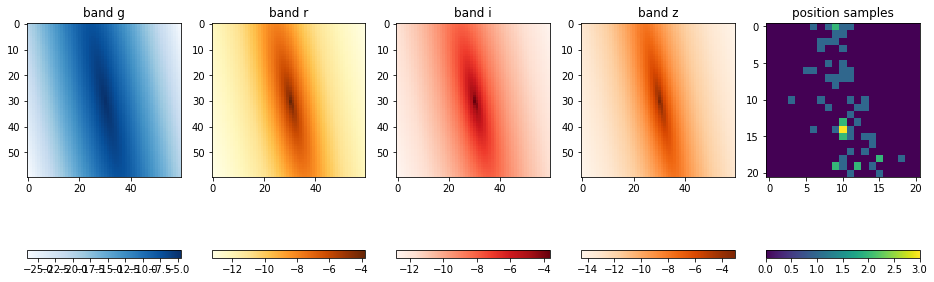

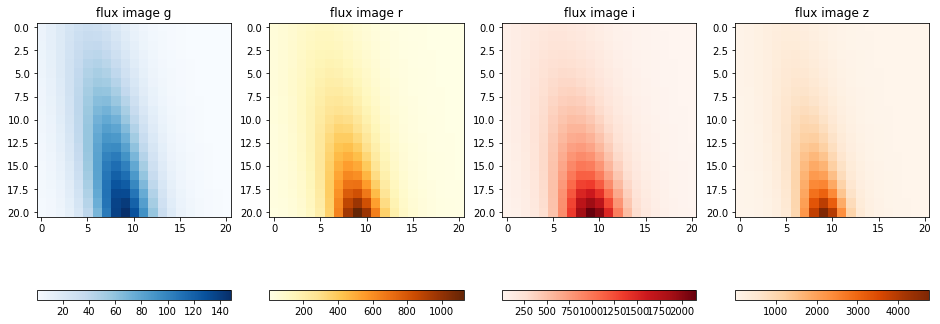

############################################################################################


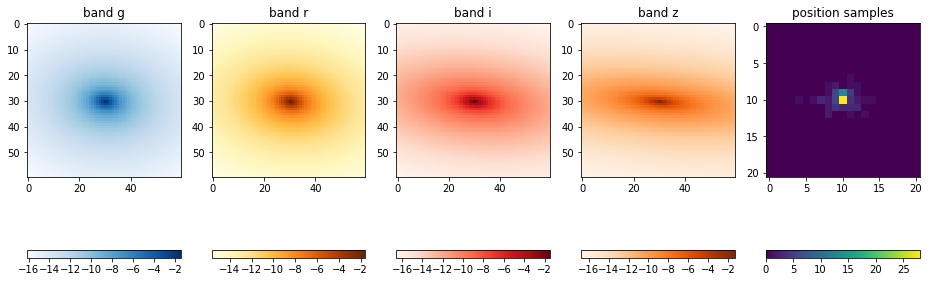

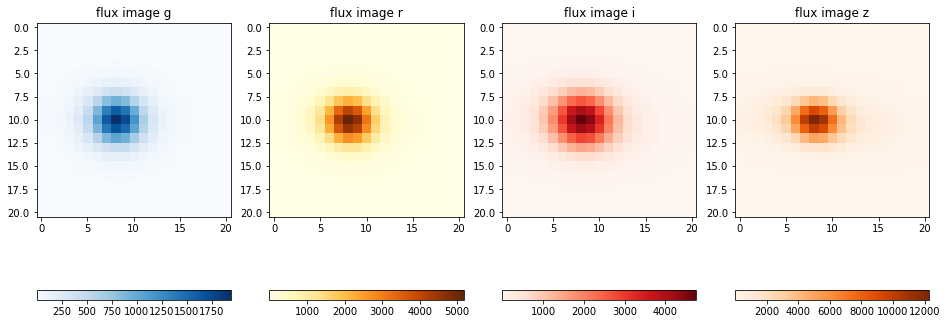

############################################################################################


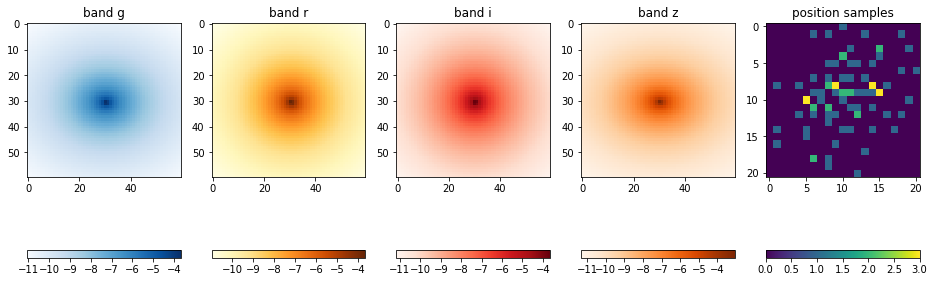

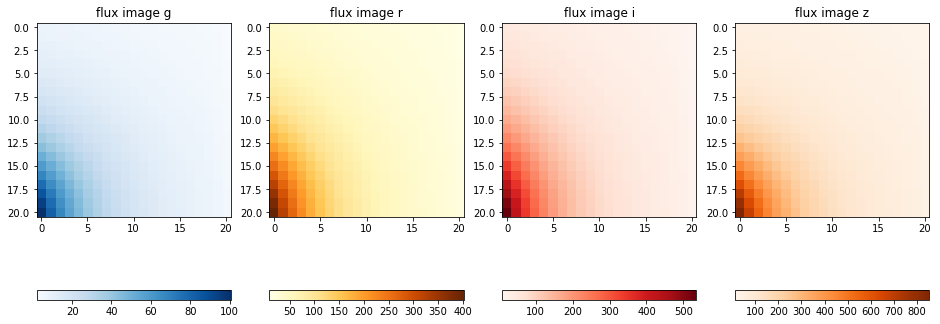

############################################################################################


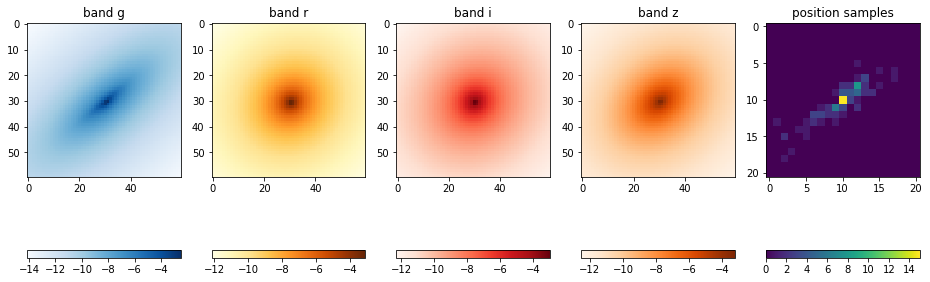

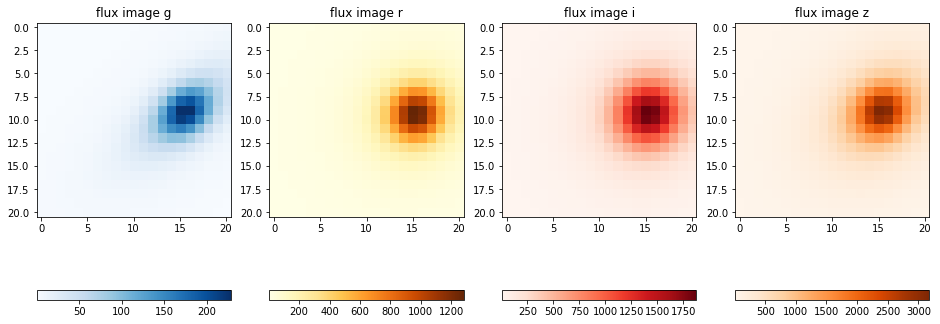

############################################################################################


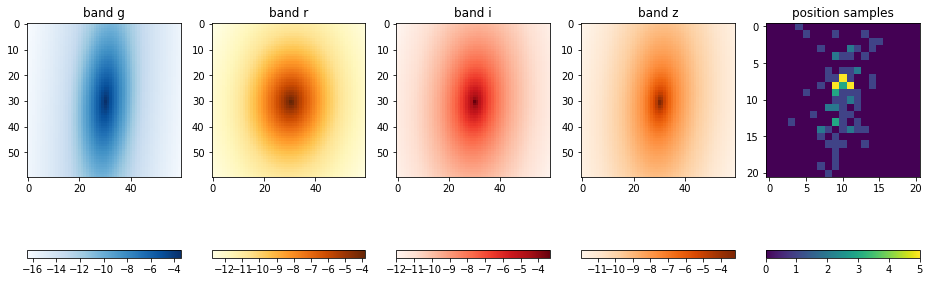

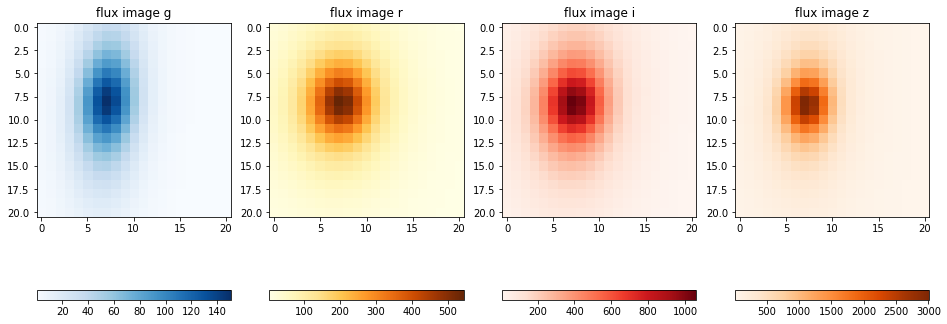

############################################################################################


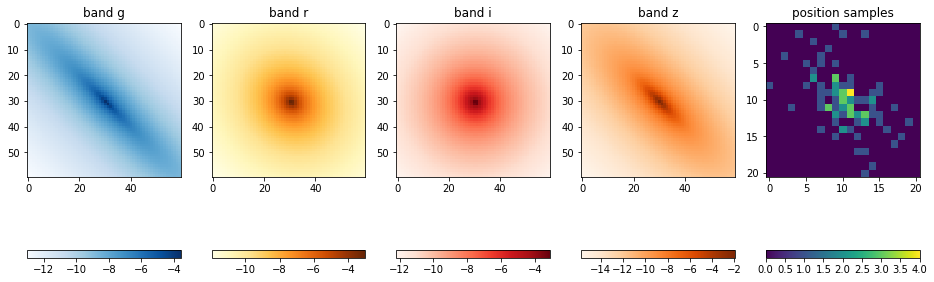

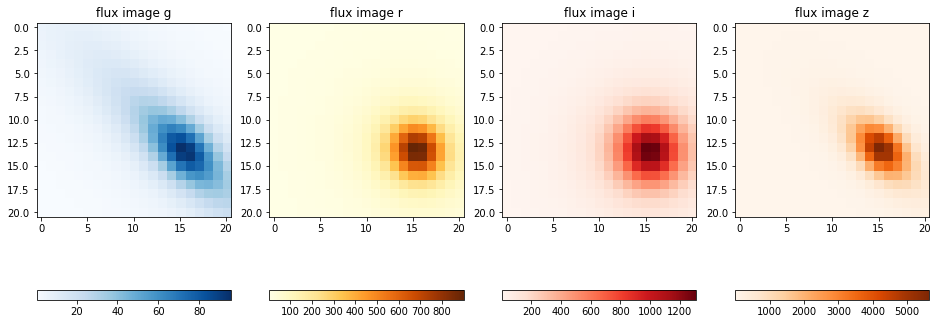

############################################################################################


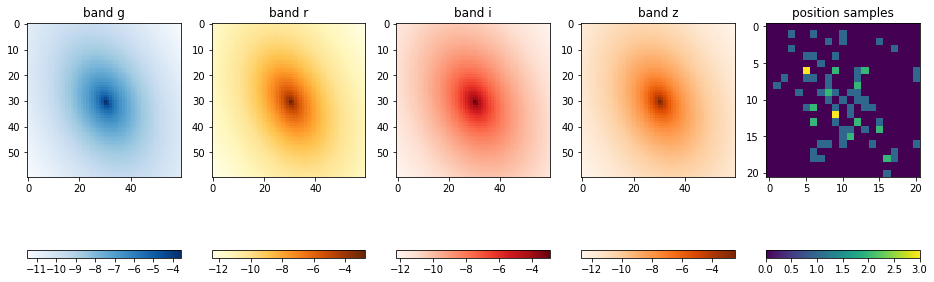

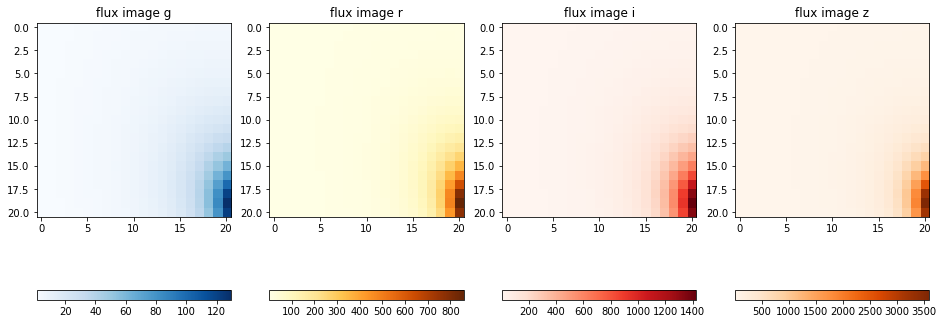

############################################################################################


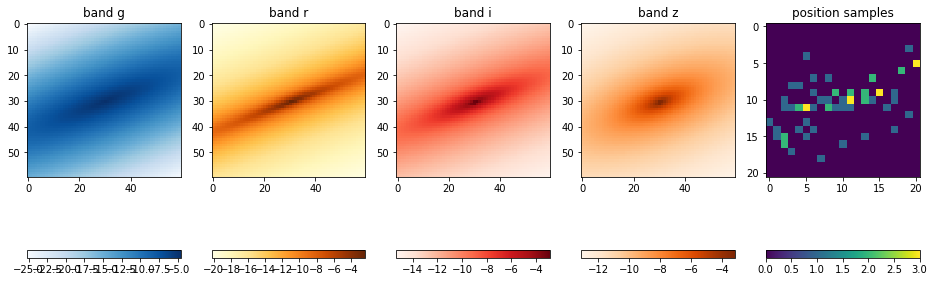

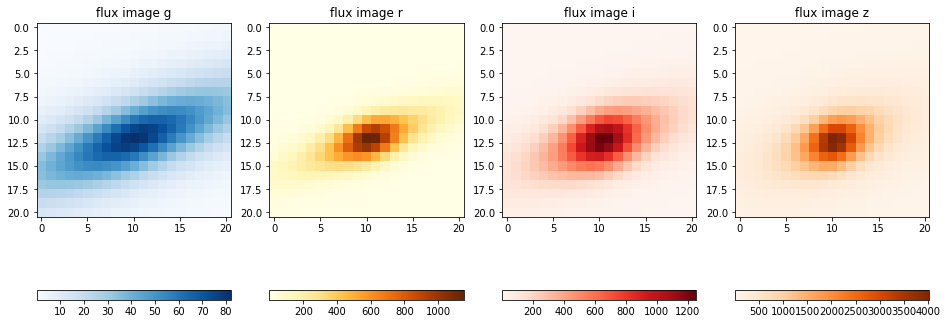

############################################################################################


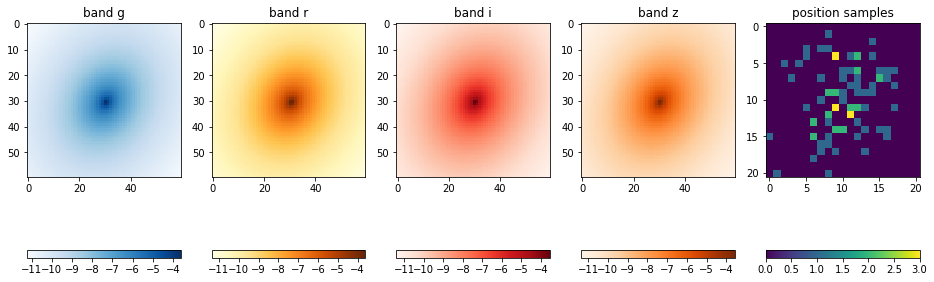

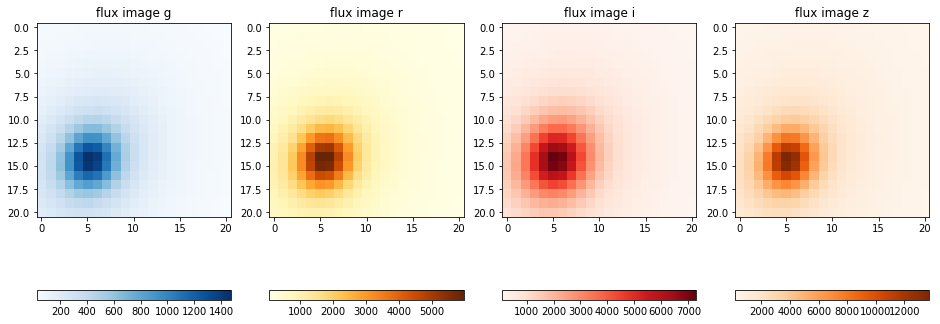

############################################################################################


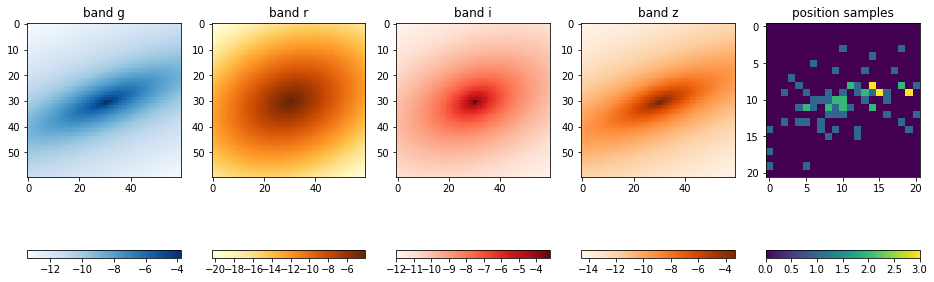

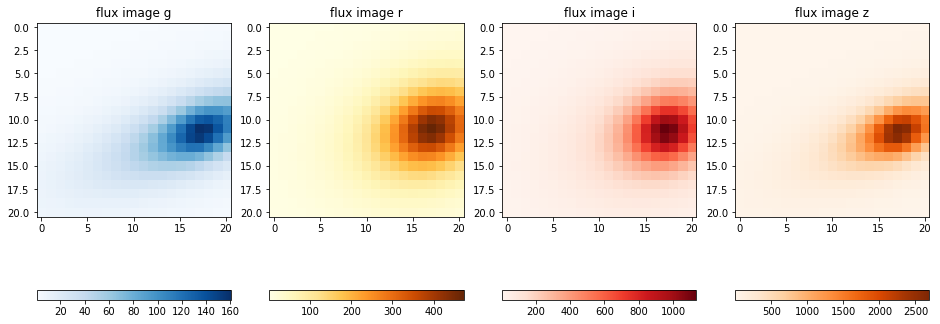

############################################################################################


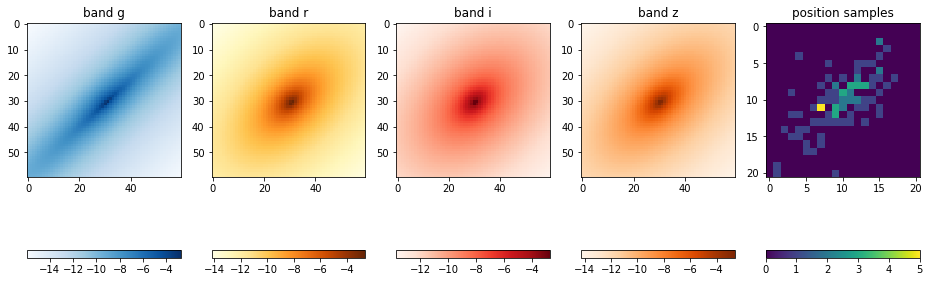

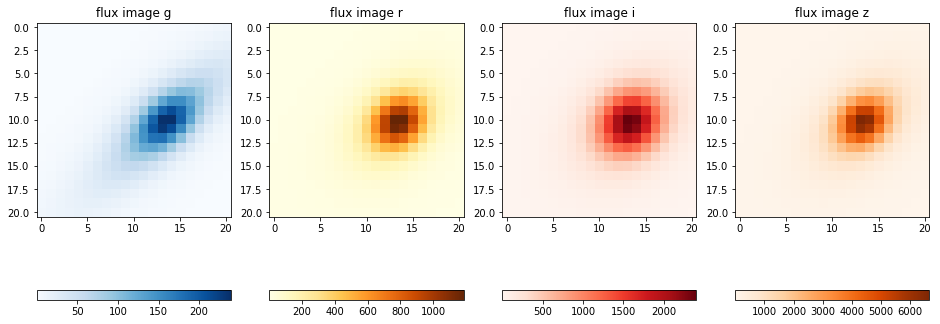

############################################################################################


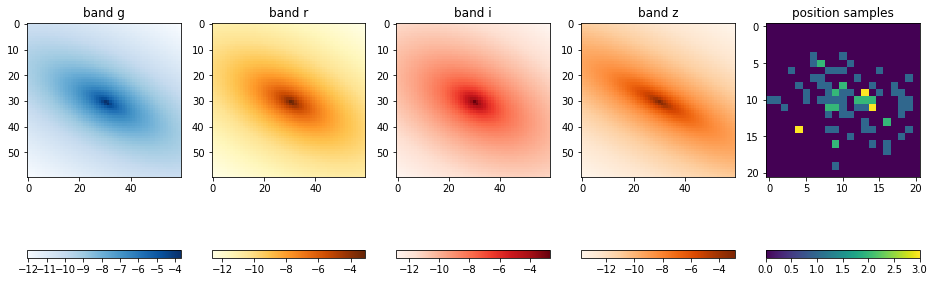

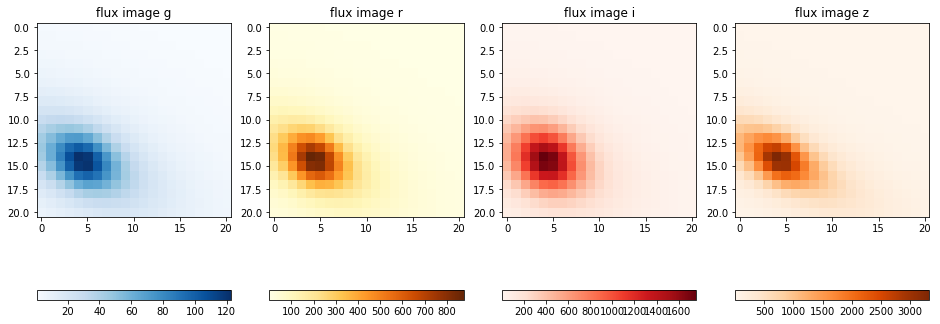

In [5]:
n_galaxies = 30
for k in range(n_galaxies):
    print("############################################################################################")
    parameters = galaxies_gen.sample_galaxy()
    par = parameters.values
    #print(parameters)
    f, ax = plt.subplots(1,5,figsize=(16,9))

    s = []
    colors = ["Blues", "YlOrBr", "Reds", "Oranges"]

    for i, band in enumerate(bands):
        s.append(ax[i].imshow(np.log(galaxies_gen.profile[band]["norm_image"]), interpolation="none", cmap=colors[i]))
        f.colorbar(s[-1], orientation="horizontal", ax=ax[i])
        ax[i].set_title("band "+band)

    histogram = np.zeros(shape=image_size)
    pos = galaxies_gen.sample_position_galaxy(n_samples=100)
    for p in pos:
        histogram[p[0],p[1]] += 1
    s5 = ax[-1].imshow(histogram[20:41, 20:41], interpolation="none")
    ax[-1].set_title("position samples")
    #s2 = ax2.imshow(histogram, interpolation="none")   
    f.colorbar(s5, orientation="horizontal", ax=ax[-1])
    #print(np.sum(galaxies_gen.norm_img))
    plt.show()

    f, ax = plt.subplots(1,4,figsize=(16,9))

    s = []
    colors = ["Blues", "YlOrBr", "Reds", "Oranges"]

    for i, band in enumerate(bands):
        stamp = galaxies_gen.generate_galaxy_stamp(band, t_exp[i], seeing[i], airmass[i], zero_points[i])
        s.append(ax[i].imshow(stamp, interpolation="none", cmap=colors[i]))
        f.colorbar(s[-1], orientation="horizontal", ax=ax[i])
        ax[i].set_title("flux image "+band)

    plt.show()